In [270]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
import math
import pandas as pd
from sklearn.datasets import make_blobs
import scipy

In [272]:
# Part2 Linear and Quadratic Classifiers

# Question 1) The general function to generate random samples
def multivariateGaussianSample(d, Mu, sigma, n):
  A = np.linalg.cholesky(sigma)
  Z = np.random.normal(size=(d, n))
  X = A@Z + Mu
  return X

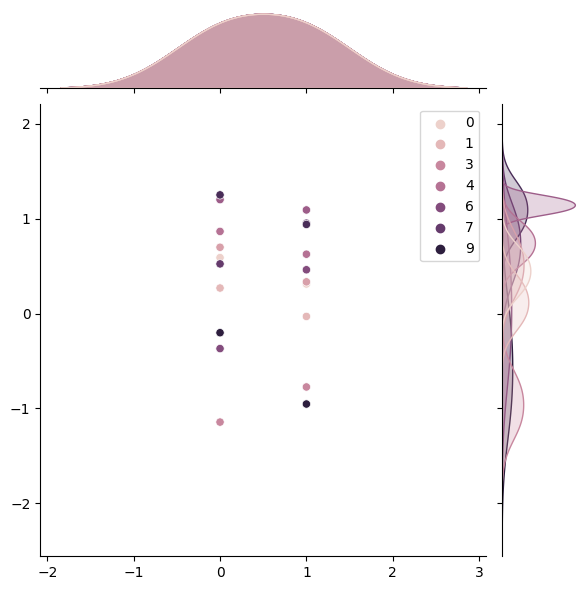

In [273]:
# test for multivariateGaussianSample
X = multivariateGaussianSample(2, np.matrix([[0.],[0.]]), np.matrix([[1, 0.8], [0.8, 1]]), 10)
Y = np.asarray(X)
X
sns.jointplot(data=Y)

In [263]:
# Question 2)  function for the discriminant
def quadraticDiscriminant(X, Sigma, mu, p):
  invSigma = inv(Sigma)
  Wc = -1/2*invSigma
  wc = invSigma @ mu
  wc0 = -1/2*(np.transpose(mu)@ invSigma @ mu) - 1/2*(math.log(np.linalg.det(Sigma))) + math.log(p)
  return np.transpose(X)@ Wc @ X + wc@X + wc0


In [309]:
# Question 3) generate 2d classification dataset
Xsample, ysample = make_blobs(n_samples=100, centers=3, n_features=2)
x1s = Xsample[:, 0]
x2s = Xsample[:, 1]
label = ysample



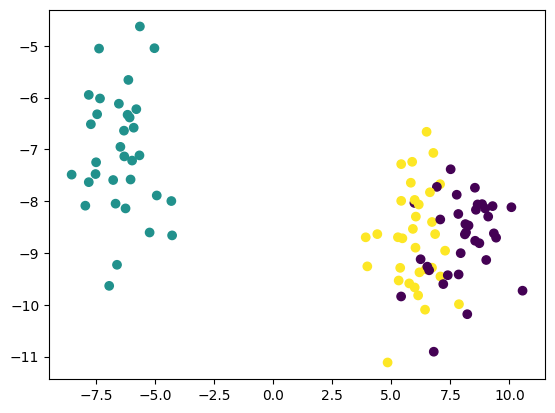

In [310]:
plt.scatter(x1s, x2s, c=label)
plt.show()


In [311]:
from sklearn.model_selection import train_test_split
# Spliting data to test and train
X_train, X_test, Y_train, Y_test = train_test_split(Xsample, ysample, train_size=0.7)


In [312]:
#Function to calculate labels' mean, covariance matrix and class probablities
def prepare(X, Y, c):
  indices = (Y==c)
  sum= np.sum(X[indices], axis=0)
  number = np.sum(indices)
  mu = sum/number
  p = number / X.size
  sigma= np.cov(X[indices][:,0], X[indices][:,1])
  return mu, sigma, p

In [313]:
#calculate the parameters for class_0, class_1 and class_2
m0, sigma0, p0 = prepare(X_train, Y_train, 0)
m1, sigma1, p1 = prepare(X_train, Y_train, 1)
m2, sigma2, p2 = prepare(X_train, Y_train, 2)

#after obtaining parameters, model is used for test data
j = Y_test.size
for i in range(j):
  cls0 = quadraticDiscriminant(X_test[i, :], sigma0, m0, p0)
  cls1 = quadraticDiscriminant(X_test[i, :], sigma1, m1, p1)
  cls2 = quadraticDiscriminant(X_test[i, :], sigma2, m2, p2)
  if cls0 == max(cls0, cls1, cls2):
    print(f" label for element {i+1} is '{Y_test[i]}', predicted label is '{0}',{Y_test[i]==0}")
  elif cls1 == max(cls0, cls1, cls2):
    print(f" label for element {i+1} is '{Y_test[i]}', predicted label is '{1}',{Y_test[i]==1}")
  elif cls2 == max(cls0, cls1, cls2):
    print(f" label for element {i+1} is '{Y_test[i]}', predicted label is '{2}',{Y_test[i]==2}")

 label for element 1 is '2', predicted label is '2',True
 label for element 2 is '1', predicted label is '1',True
 label for element 3 is '0', predicted label is '0',True
 label for element 4 is '1', predicted label is '1',True
 label for element 5 is '2', predicted label is '2',True
 label for element 6 is '1', predicted label is '1',True
 label for element 7 is '1', predicted label is '1',True
 label for element 8 is '2', predicted label is '2',True
 label for element 9 is '2', predicted label is '2',True
 label for element 10 is '2', predicted label is '2',True
 label for element 11 is '0', predicted label is '2',False
 label for element 12 is '2', predicted label is '2',True
 label for element 13 is '1', predicted label is '1',True
 label for element 14 is '1', predicted label is '1',True
 label for element 15 is '1', predicted label is '1',True
 label for element 16 is '2', predicted label is '2',True
 label for element 17 is '0', predicted label is '2',False
 label for element 18

In [314]:
#Question 4) Write a procedure for computing the Mahalanobis distance
def computeMahalanobis(x, Mu, Sigma):
  inv_Sigma = inv(Sigma)
  d_mahal = np.transpose(x-Mu) @ inv_Sigma @ (x-Mu)
  return d_mahal

In [315]:
#Question 5) naive bayes classifier

# this model takes X_training, Y_training and num_of_classes as arguments and returns the all classes mean, standard deviation and class probability

def create_model(X, Y, num_of_classes):
  n = X.shape[0]
  m = X.shape[1]
  summarize = [[[0 for x in range(3)] for y in range(m)] for z in range(num_of_classes)]

  for j in range(num_of_classes):
    indices = (Y==j)
    for i in range(m):
      sumXic= np.sum(X[:, i][indices], axis=0)
      number = np.sum(indices)
      mean = sumXic/float(number)
      sum1 = 0
      for x in X[:, i][indices]:
        sum1 += (x-mean)**2
      variance = sum1 / (n-1)
      st_dev = variance**(1/2)
      pclass = number/Y.size
      summarize[j][i] = [mean, st_dev, pclass]
  return summarize

In [316]:
# test to create_model() function
summarize = np.array(create_model(X_train, Y_train, 3))
print(summarize)
print(summarize.shape[0])


[[[ 8.20010666  0.69377789  0.38571429]
  [-8.75124312  0.51204561  0.38571429]]

 [[-6.74728084  0.50036446  0.28571429]
  [-7.11198336  0.60660486  0.28571429]]

 [[ 6.07360637  0.54070765  0.32857143]
  [-8.86370679  0.53785999  0.32857143]]]
3


In [317]:
# Since we need a p(xi|wj), we can use gaussian PDF formula
def probability_x_c(x, mean, st_dev):
  return (1/(math.sqrt(2*math.pi)*st_dev))* math.exp(-(((x-mean)**2) / (2*st_dev**2)))


#this function takes X_test data, Y_test data and output of the create_model method that includes the class parameters as arguments and returns the P (Y|x) ∝ p(x|Y)*P(Y )
# as log(P(Ck)) +sum(log(P(xi|Ck))

def bayesian_model(X, Y, smrz_Matrix):
  num_of_sample = Y.size
  num_of_feature = X.shape[1]
  num_of_classes = smrz_Matrix.shape[0]
  logs = [[0 for y in range(num_of_sample)] for t in range(num_of_classes)]
  for i in range(num_of_classes):
    for j in range(num_of_sample):
      prob = 0
      for k in range(num_of_feature):
        prob += math.log(probability_x_c(X[j, k], smrz_Matrix[i][k][0], smrz_Matrix[i][k][1]))
      p_c_x = math.log(smrz_Matrix[i][1][2]) + prob
      logs[i][j] = p_c_x

  return logs




In [318]:
#This method calls the bayesian_model method and returns transpose matrix of its output
def model_evaluate(X_train, X_test, Y_train, Y_test, num_of_classes):
  smrz_Matrix = np.array(create_model(X_train, Y_train, num_of_classes))
  logs = bayesian_model(X_test, Y_test, smrz_Matrix)
  return np.transpose(logs)

#Finally index array is used for choosing higher probability and assign element to that class
final = model_evaluate(X_train, X_test, Y_train, Y_test, 3)
index_array = np.argmax(final, axis=-1)
#Compare predicted and real classes
print(index_array==Y_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y_test != index_array).sum()))

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True]
Number of mislabeled points out of a total 30 points : 3


In [319]:
# Python built-in implemantation results for data set.
#1 built-in naive bayes model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print(y_pred==Y_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y_test != y_pred).sum()))

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True]
Number of mislabeled points out of a total 30 points : 3


In [321]:
#2 built-in KNN model
from tables.leaf import toarray
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
y_tr = Y_train.tolist()
y_tes = Y_test.tolist()
print(y_tes)
neigh.fit(X_train, y_tr)
print(neigh.predict(X_test) == Y_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y_test != neigh.predict(X_test)).sum()))

[2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0]
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True]
Number of mislabeled points out of a total 30 points : 3


# MISC CODE
## PROBLEM 1

In [322]:
# First of all open the classifier errors measurements
with open("/content/hw1-scores.txt", "r") as data:
  lines = data.readlines()
  line_matrix = [list(map(float,i.strip().split(','))) for i in lines]
  scores = np.array(line_matrix)

In [323]:
from matplotlib.cbook import index_of
from numpy.lib.function_base import average

#H0: All of the classifiers are performing equally.
# To examine the H0, we use the Friedman Test.

#function to calculate ranks
def calculate_ranks(X):
  k = X.shape[1]
  N = X.shape[0]
  #assigning the initial ranks
  order = np.argsort(np.argsort(X, axis=1))
  ranks = [[0.0 for x in range(k)] for y in range(N)]
  ranks = float(k) - order
  #check duplicated values, if there are any duplicates, assign their rank mean to their rank
  for i in range(N):
    if k != np.unique(X[i]).size:
      uniq = []
      dup = []
      for element in X[i]:
        if element not in uniq:
          uniq.append(element)
        elif element not in dup:
          m = np.where(X[i] == element)[0]
          sumy = 0
          for e in range(m.shape[0]):
            sumy += ranks[i,m[e]]
          avgt = float(sumy)/m.shape[0]
          for e in range(m.shape[0]):
            ranks[i,m[e]] = float(avgt)

  average_ranks = average(ranks, axis=0)
  sum_avg = 0
  for element in average_ranks:
    sum_avg += (element**2)

  X2F = ((12*N)/(k*(k+1)))*(sum_avg - (k*((k+1)*(k+1))/4))
  FF = ((N-1)*X2F)/((N*(k-1))-X2F)

  #calculate degrees of freedom for F distrubition
  F1 = k-1
  F2 = (k-1) * (N-1)
  DoF = (F1, F2)

  return FF, DoF, average_ranks


##Evaluation of null hypothesis

In [324]:
FF, DoF, average_ranks = calculate_ranks(scores)
critical_value = scipy.stats.f.ppf(q=1-.05, dfn=DoF[0], dfd=DoF[1])
if (FF > critical_value):
  print(f'Critical value:{critical_value} of F{DoF} for alpha=0.05 is smaller than FF:{FF}, then Null hypotesis is rejected')
else:
  print('Null hypothesis is accapted')


Critical value:2.283930904300519 of F(5, 130) for alpha=0.05 is smaller than FF:10.280557834290404, then Null hypotesis is rejected


In [325]:
#Check model through Demšar's paper example
vert = np.array([[0.763, 0.768, 0.771, 0.798],
 [0.599, 0.591, 0.590, 0.569],
 [0.954, 0.971, 0.968, 0.967],
 [0.628, 0.661, 0.654, 0.657],
 [0.882, 0.888, 0.886, 0.898],
 [0.936, 0.931, 0.916, 0.931],
 [0.661, 0.668, 0.609, 0.685],
 [0.583, 0.583, 0.563, 0.625],
 [0.775, 0.838, 0.866, 0.875],
 [0.940, 0.962, 0.965, 0.962],
 [0.619, 0.666, 0.614, 0.669],
 [0.972, 0.981, 0.975, 0.975],
 [1, 1, 1, 1],
 [0.957, 0.978, 0.946, 0.970]])

FF2, DoF2, average_ranks2 = calculate_ranks(vert)

critical_value2 = scipy.stats.f.ppf(q=1-.05, dfn=DoF2[0], dfd=DoF2[1])
if (FF2 > critical_value2):
  print(f'Critical value:{critical_value2} of F{DoF2} for alpha=0.05 is smaller than FF:{FF2}, then Null hypotesis is rejected')
else:
  print('Null hypothesis is accapted')

Critical value:2.8450678052793514 of F(3, 39) for alpha=0.05 is smaller than FF:3.9866666666666495, then Null hypotesis is rejected


In [326]:
# To examine the question that 'Is there one or more classifiers that is performing better than the others?' we can apply the post-hoc test.
#Applying The Nemenyi test
def calculate_CD(X, q_alpha):
  k = X.shape[1]
  N = X.shape[0]
  CD = q_alpha * (math.sqrt((k*(k+1))/(6*N)))
  return CD

In [327]:
# from the table q_alpha=2.569 for 4 classifiers for p=0.05
# from the table q_alpha=2.291 for 4 classifiers for p=0.10
# from the table q_alpha=2.850 for 6 classifiers for p=0.05
# from the table q_alpha=2.589 for 6 classifiers for p=0.10
print(average_ranks)
CD_p05 = calculate_CD(scores, 2.850)
Bt = [[0 for x in range(6)] for y in range(6)]
for i in range(5):
  for j in range(i+1,6):
    Bt[i][j]= average_ranks[i]-average_ranks[j]
    if Bt[i][j] > CD_p05:
      print(f"for p=0.05, classifier {i+1} is significantly better than classifier {j+1} ({Bt[i][j]}>{CD_p05})")
    elif abs(Bt[i][j]) > CD_p05:
      print(f"for p=0.05, classifier {j+1} is significantly better than classifier {i+1} ({abs(Bt[i][j])}>{CD_p05})")

CD_p10 = calculate_CD(scores, 2.589)

Btx = [[0 for x in range(6)] for y in range(6)]
for i in range(5):
  for j in range(i+1,6):
    Btx[i][j]= average_ranks[i]-average_ranks[j]
    if Btx[i][j] > CD_p10:
      print(f"for p=0.10, classifier {i+1} is significantly better than classifier {j+1} ({Btx[i][j]}>{CD_p10})")
    elif abs(Btx[i][j]) > CD_p10:
      print(f"for p=0.10, classifier {j+1} is significantly better than classifier {i+1} ({abs(Btx[i][j])}>{CD_p10})")

[2.90740741 4.7037037  4.18518519 4.25925926 2.46296296 2.48148148]
for p=0.05, classifier 2 is significantly better than classifier 1 (1.7962962962962958>1.4511489700693494)
for p=0.05, classifier 2 is significantly better than classifier 5 (2.2407407407407405>1.4511489700693494)
for p=0.05, classifier 2 is significantly better than classifier 6 (2.222222222222222>1.4511489700693494)
for p=0.05, classifier 3 is significantly better than classifier 5 (1.7222222222222223>1.4511489700693494)
for p=0.05, classifier 3 is significantly better than classifier 6 (1.7037037037037037>1.4511489700693494)
for p=0.05, classifier 4 is significantly better than classifier 5 (1.7962962962962967>1.4511489700693494)
for p=0.05, classifier 4 is significantly better than classifier 6 (1.7777777777777781>1.4511489700693494)
for p=0.10, classifier 2 is significantly better than classifier 1 (1.7962962962962958>1.31825427491563)
for p=0.10, classifier 4 is significantly better than classifier 1 (1.351851851

Through these results classifier 2, classifier 3, and classifier 4 performing better than classifier 5 and classifier 6. We can not tell which group classifier 1 is belogs to.